In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## Load Data

In [5]:
data = np.load("../my_comp_train_XY.npz")
X = data["X"]
y = data["y"]

## Split train and test data

In [6]:
X = X.reshape(X.shape[0], -1)
# split train and test data(ratio 0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Classification

### Linear SVM(no scale)

In [7]:
# first LinearSVC with cross validation
linsvc_clf = LinearSVC()
cross_val_score(linsvc_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.86897007, 0.87672137, 0.85198318])

In [8]:
# accuracy score
y_linsvc_train_pred = cross_val_predict(linsvc_clf, X_train, y_train, cv=3)
accuracy_score_linsvc_train = accuracy_score(y_linsvc_train_pred, y_train)
print(accuracy_score_linsvc_train)

C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.85772793491108


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
# confusion matrix
matric_linsvc_train = confusion_matrix(y_train, y_linsvc_train_pred)
matric_linsvc_train

array([[3145,    0,   21,    7,   12,   25,   30,    2,   73,    2],
       [   2, 2512,   15,   11,   15,   11,    8,    3,  113,    7],
       [  53,   75, 3481,   65,   94,   39,   87,   61,  315,   19],
       [  35,   27,  131, 3053,   36,  203,   15,   39,  306,   78],
       [   8,   13,   42,    8, 2931,   18,   23,   12,   49,  167],
       [  34,   15,   27,  112,   52, 1858,   76,   24,  341,   63],
       [  40,   13,   44,    2,   76,   75, 3952,    1,   54,    4],
       [  22,   14,   36,   20,  139,   10,    7, 3448,   50,  263],
       [  43,   64,   60,   59,   81,  146,   47,   19, 4060,  102],
       [  17,    9,   22,   24,  260,   35,    5,  122,   72, 2765]],
      dtype=int64)

<AxesSubplot:>

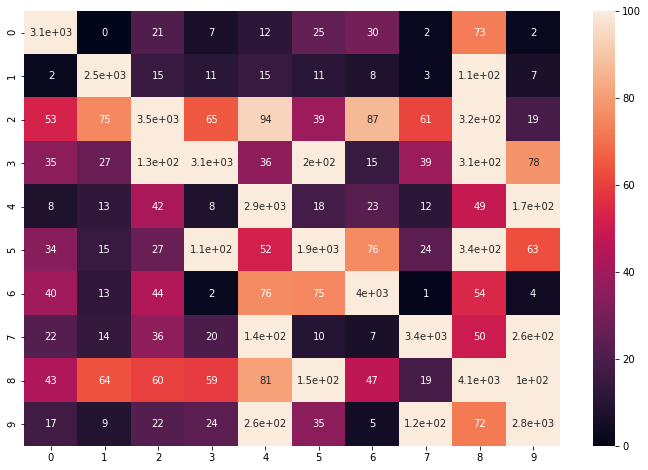

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(matric_linsvc_train, annot=True, vmin=0, vmax=100)

### LinearSVM(0 to 1 scaled)

In [11]:
X_train_scaled = X_train/255.0

In [12]:
# LinearSVC with cross validation
linsvc_clf = LinearSVC()
cross_val_score(linsvc_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.90525274, 0.90566504, 0.90129463])

In [13]:
# accuracy score
y_linsvc_train_scaled_pred = cross_val_predict(linsvc_clf, X_train_scaled, y_train, cv=3)
accuracy_score_linsvc_train_scaled = accuracy_score(y_linsvc_train_scaled_pred, y_train)
print(accuracy_score_linsvc_train_scaled)

C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9040982930650614


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
# confusion matrix value
matric_linsvc_train_scaled = confusion_matrix(y_train, y_linsvc_train_scaled_pred)
matric_linsvc_train_scaled

array([[3189,    0,   17,   10,    9,   21,   27,    4,   37,    3],
       [   1, 2586,   19,    8,    1,   15,    6,    8,   49,    4],
       [  36,   43, 3821,   79,   46,   11,   57,   59,  126,   11],
       [  28,   19,  128, 3413,   12,  131,   16,   39,   95,   42],
       [   6,   18,   35,    9, 2979,   12,   25,   17,   40,  130],
       [  32,   10,   29,  117,   31, 2164,   56,   20,  103,   40],
       [  31,   13,   38,    3,   27,   45, 4061,    4,   37,    2],
       [  13,   16,   43,   15,   45,    9,    8, 3721,   16,  123],
       [  41,   75,   66,  124,   29,  103,   52,   23, 4098,   70],
       [  16,   14,   13,   63,  131,   34,    5,  150,   45, 2860]],
      dtype=int64)

<AxesSubplot:>

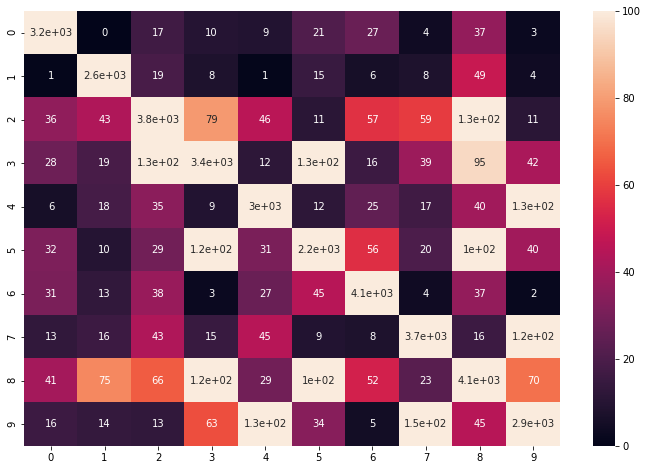

In [15]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_linsvc_train_scaled, annot=True, vmin=0, vmax=100)

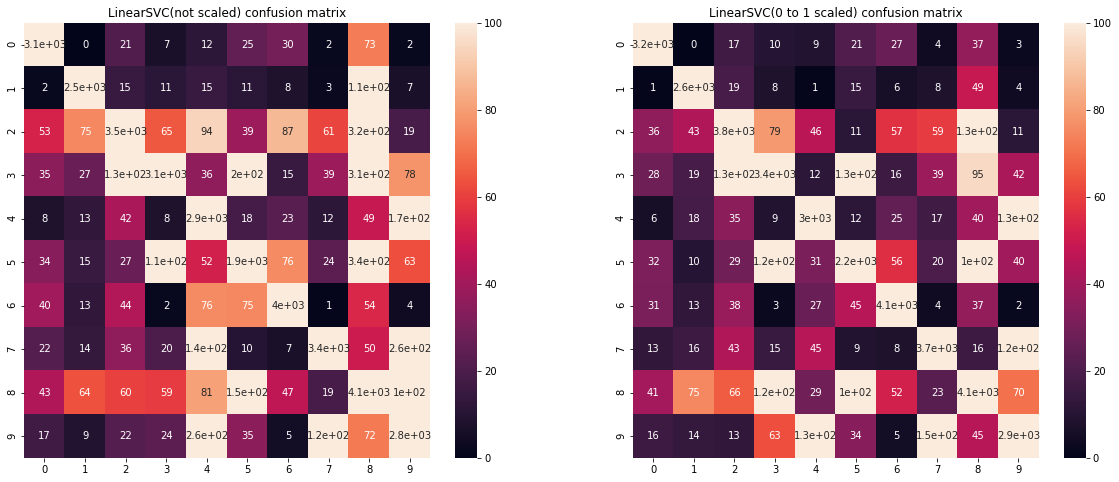

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

map_min, map_max = 0, 100
sns.heatmap(matric_linsvc_train, annot=True, vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matric_linsvc_train_scaled, annot=True, vmin=map_min, vmax=map_max, ax=axs[1])
axs[0].set_title("LinearSVC(not scaled) confusion matrix")
axs[1].set_title("LinearSVC(0 to 1 scaled) confusion matrix")
plt.show()

#### observation
X_train scaled is better

### LinearSVM with gridSearch

In [17]:
# grid search parameter
param_grid = [
     {"C": [0.001, 0.005 ,0.01, 0.05, 0.1, 1]} # regularization term
]

In [18]:
linsvc_clf_gs = GridSearchCV(linsvc_clf, param_grid, verbose=2, cv=3)
linsvc_clf_gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............................................C=0.001; total time=   8.1s
[CV] END ............................................C=0.001; total time=   5.1s
[CV] END ............................................C=0.001; total time=   2.9s
[CV] END ............................................C=0.005; total time=   2.9s
[CV] END ............................................C=0.005; total time=   2.9s
[CV] END ............................................C=0.005; total time=   2.8s
[CV] END .............................................C=0.01; total time=   3.6s
[CV] END .............................................C=0.01; total time=   3.9s
[CV] END .............................................C=0.01; total time=   3.6s
[CV] END .............................................C=0.05; total time=  11.1s
[CV] END .............................................C=0.05; total time=  10.6s
[CV] END ........................................

C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] END ................................................C=1; total time=  43.8s


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] END ................................................C=1; total time=  43.4s


C:\Users\FYOSHIAKI\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] END ................................................C=1; total time=  44.4s


GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1]}], verbose=2)

In [19]:
linsvc_clf_gs.cv_results_

{'mean_fit_time': array([ 5.36849896,  2.92677307,  3.76652884, 10.88838808, 18.75421929,
        43.89992166]),
 'std_fit_time': array([2.09262761, 0.04456665, 0.14267684, 0.18637617, 1.07337773,
        0.42123162]),
 'mean_score_time': array([0.1042939 , 0.03889799, 0.04354835, 0.04421608, 0.04553437,
        0.04239448]),
 'std_score_time': array([0.06652421, 0.00282165, 0.00385047, 0.00248672, 0.00492263,
        0.00669858]),
 'param_C': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.005},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 1}],
 'split0_test_score': array([0.89774882, 0.90747918, 0.90888101, 0.90987054, 0.90855117,
        0.90517028]),
 'split1_test_score': array([0.90079987, 0.9080564 , 0.909953  , 0.9103653 , 0.90978808,
        0.90550012]),
 'split2_test_score': array([0.89271873, 0.90327369, 0.9058299

In [20]:
# params vs accuracy
params = linsvc_clf_gs.cv_results_['params']
accuracy_list = linsvc_clf_gs.cv_results_['mean_test_score']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["acc"] = accuracy
    result_list.append(param)

In [21]:
result_list

[{'C': 0.001, 'acc': 0.8970891399356807},
 {'C': 0.005, 'acc': 0.9062697561914187},
 {'C': 0.01, 'acc': 0.9082213243176384},
 {'C': 0.05, 'acc': 0.9085786536928616},
 {'C': 0.1, 'acc': 0.90742420494214},
 {'C': 1, 'acc': 0.9039333718149584}]

In [22]:
df_result_list = pd.DataFrame(result_list)
df_result_list

,C,acc
0,0.001,0.897089
1,0.005,0.906270
2,0.010,0.908221
3,0.050,0.908579
4,0.100,0.907424
5,1.000,0.903933


<AxesSubplot:xlabel='C', ylabel='acc'>

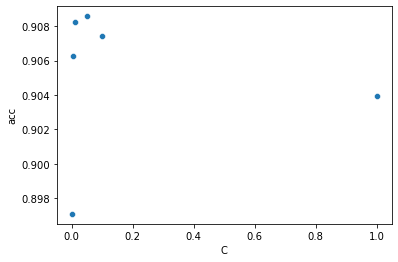

In [23]:
# plot params vs accuracy
sns.scatterplot(data=df_result_list, x="C", y="acc")

#### observation
regularization term C = 0.05 is best

In [28]:
# accuracy score
y_linsvc_gs_train_scaled_pred = cross_val_predict(
    linsvc_clf_gs.best_estimator_, X_train_scaled, y_train, cv=3)
accuracy_score_linsvc_gs_train_scaled = accuracy_score(y_linsvc_gs_train_scaled_pred, y_train)
print(accuracy_score_linsvc_gs_train_scaled)

0.9085786536928616


In [30]:
# confusion matrix value
matric_linsvc_gs_train_scaled = confusion_matrix(y_train, y_linsvc_gs_train_scaled_pred)
matric_linsvc_gs_train_scaled

array([[3207,    0,   11,    8,    7,   14,   30,    5,   31,    4],
       [   1, 2595,   14,    7,    1,   13,    8,    7,   48,    3],
       [  31,   38, 3846,   69,   53,   15,   50,   61,  116,   10],
       [  24,   22,  117, 3444,    5,  114,   21,   41,   97,   38],
       [   7,   15,   27,    6, 3000,    7,   21,   10,   39,  139],
       [  39,   15,   25,  108,   28, 2170,   55,   16,  105,   41],
       [  29,    9,   32,    6,   24,   41, 4080,    4,   33,    3],
       [  17,   17,   44,   15,   38,    9,    7, 3735,   20,  107],
       [  39,   90,   58,  127,   26,   93,   52,   20, 4104,   72],
       [  19,   11,   12,   62,  127,   29,    4,  157,   36, 2874]],
      dtype=int64)

<AxesSubplot:>

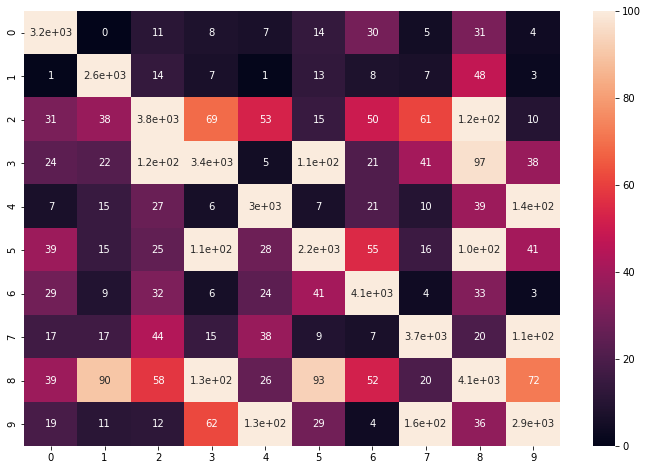

In [32]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_linsvc_gs_train_scaled, annot=True, vmin=0, vmax=100)

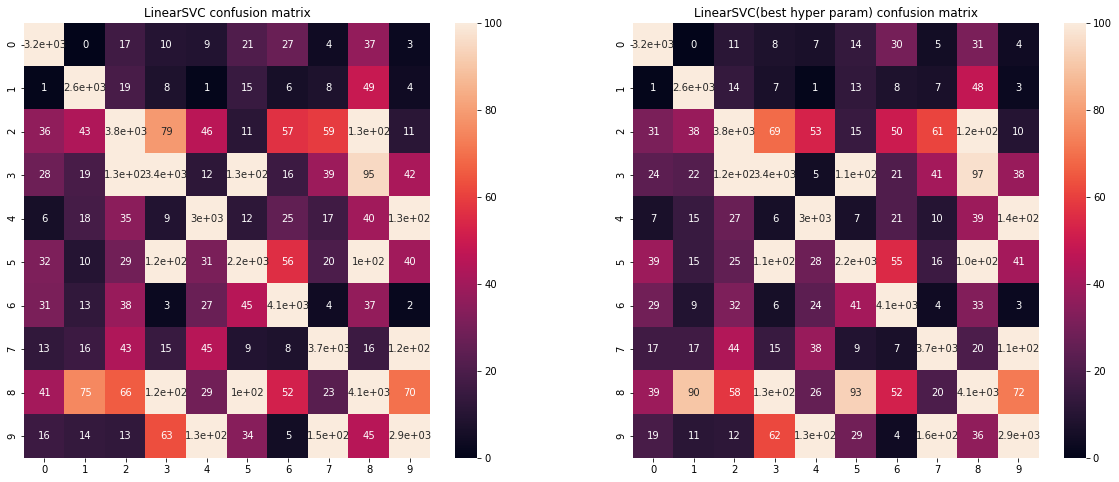

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

map_min, map_max = 0, 100
sns.heatmap(matric_linsvc_train_scaled, annot=True, vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matric_linsvc_gs_train_scaled, annot=True, vmin=map_min, vmax=map_max, ax=axs[1])
axs[0].set_title("LinearSVC confusion matrix")
axs[1].set_title("LinearSVC(best hyper param) confusion matrix")
plt.show()

### SVM classifier

In [38]:
# split train data for SVM(ratio 0.1)
X_train_svc, X_valid_svc, y_train_svc, y_valid_svc = train_test_split(
    X_train_scaled, y_train, test_size=0.5, stratify=y_train)

In [39]:
# svm classifier(RBF kernel) with cross validation (data instance 1/2)
svc_clf = SVC(kernel="rbf", C=0.05)
cross_val_score(svc_clf, X_train_svc, y_train_svc, cv=3, scoring="accuracy")

array([0.91259894, 0.91373907, 0.92511958])

In [ ]:
# svm classifier(RBF kernel) with cross validation
svc_clf = SVC(kernel="rbf", C=0.05)
cross_val_score(svc_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## SVM with GridSearch

In [37]:
# grid search parameter
param_grid = [
     {"gamma": [1e-4, 1e-3, 1e-2], # kernel coefficient
     "C": [0.01, 0.05, 0.1]} # regularization term
]

In [40]:
# svm classifier(RBF kernel) with grid search
svc_clf1 = SVC(kernel="rbf", C=0.05)
svc_clf_gs = GridSearchCV(svc_clf1, param_grid, verbose=2, cv=3)
svc_clf_gs.fit(X_train_svc, y_train_svc)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...............................C=0.01, gamma=0.0001; total time= 6.9min
[CV] END ...............................C=0.01, gamma=0.0001; total time= 6.2min
[CV] END ...............................C=0.01, gamma=0.0001; total time= 5.8min
[CV] END ................................C=0.01, gamma=0.001; total time= 6.0min
[CV] END ................................C=0.01, gamma=0.001; total time= 5.7min
[CV] END ................................C=0.01, gamma=0.001; total time= 5.2min
[CV] END .................................C=0.01, gamma=0.01; total time= 4.2min
[CV] END .................................C=0.01, gamma=0.01; total time=10.6min
[CV] END .................................C=0.01, gamma=0.01; total time= 4.3min
[CV] END ...............................C=0.05, gamma=0.0001; total time= 4.9min
[CV] END ...............................C=0.05, gamma=0.0001; total time=17.5min
[CV] END ...............................C=0.05, g

GridSearchCV(cv=3, estimator=SVC(C=0.05),
             param_grid=[{'C': [0.01, 0.05, 0.1],
                          'gamma': [0.0001, 0.001, 0.01]}],
             verbose=2)

In [41]:
svc_clf_gs.cv_results_

{'mean_fit_time': array([259.72643606, 242.5956262 , 286.13412555, 415.52952139,
        453.75359909,  96.45196422, 214.29359269, 180.57554539,
         81.78983863]),
 'std_fit_time': array([ 17.92518163,  14.21408452, 158.81058519, 284.7947463 ,
        203.27786507,   4.60886253,   1.31692129,  80.02383518,
          7.97762492]),
 'mean_score_time': array([118.43690618,  96.00283933,  97.21445115, 416.4341681 ,
        285.61532966,  81.09436711,  92.34748212, 152.35601075,
         73.90887078]),
 'std_score_time': array([ 12.4664249 ,   5.5850259 ,  21.49511589, 305.52795511,
        156.57080716,  14.83833594,   4.20253856, 104.05605979,
         10.25374661]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0001, 0.001, 0.01, 0.0001, 0.001, 0.01, 0.0001

In [42]:
# params vs accuracy
params = svc_clf_gs.cv_results_['params']
accuracy_list = svc_clf_gs.cv_results_['mean_test_score']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["acc"] = accuracy
    result_list.append(param)

In [43]:
result_list

[{'C': 0.01, 'gamma': 0.0001, 'acc': 0.12864211182756954},
 {'C': 0.01, 'gamma': 0.001, 'acc': 0.12880702854562423},
 {'C': 0.01, 'gamma': 0.01, 'acc': 0.7838924164203162},
 {'C': 0.05, 'gamma': 0.0001, 'acc': 0.12864211182756954},
 {'C': 0.05, 'gamma': 0.001, 'acc': 0.7673448959626646},
 {'C': 0.05, 'gamma': 0.01, 'acc': 0.9102805727489621},
 {'C': 0.1, 'gamma': 0.0001, 'acc': 0.13315004095809593},
 {'C': 0.1, 'gamma': 0.001, 'acc': 0.8471139973259376},
 {'C': 0.1, 'gamma': 0.01, 'acc': 0.9279276860771922}]

In [44]:
df_result_list = pd.DataFrame(result_list)
df_result_list

,C,gamma,acc
0,0.01,0.0001,0.128642
1,0.01,0.0010,0.128807
2,0.01,0.0100,0.783892
3,0.05,0.0001,0.128642
4,0.05,0.0010,0.767345
5,0.05,0.0100,0.910281
6,0.10,0.0001,0.133150
7,0.10,0.0010,0.847114
8,0.10,0.0100,0.927928


<AxesSubplot:xlabel='C', ylabel='acc'>

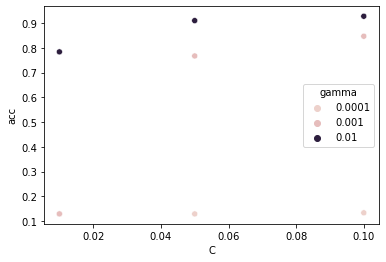

In [45]:
# plot params vs accuracy
sns.scatterplot(data=df_result_list, x="C", y="acc", hue="gamma")

## SVM with GridSearch(another condition)

In [ ]:
# grid search parameter
param_grid = [
     {"gamma": [0.01, 0.5, 0.1], # kernel coefficient
     "C": [ 0.1, 0.5, 1.0]} # regularization term
]

In [ ]:
# svm classifier(RBF kernel) with grid search
svc_clf1 = SVC(kernel="rbf", C=0.05)
svc_clf_gs = GridSearchCV(svc_clf1, param_grid, verbose=2, cv=3)
svc_clf_gs.fit(X_train_svc, y_train_svc)

## SVM with dimention reduction (PCA)

In [ ]:
pipeline_pca = Pipeline({
    ("pca", PCA()),
    ("estimator", svc_clf_gs.best_estimator_)
})

param_grid = [
    {"pca__n_components": [89, 156, 334]}
]

svc_clf_gs_pca = GridSearchCV(pipeline_pca, param_grid, cv=3)
svc_clf_gs_pca.fit(X_train_scaled, y_train)